# K-Nearest Neighbor

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Stitch-bleu/inde-577-project/blob/main/Supervised/5_k-Nearest%20Neighbors/K_Nearest_Neighbor.ipynb)

The k-Nearest Neighbors (k-NN) algorithm is a simple yet powerful machine learning method used primarily for classification and regression tasks. It’s an instance-based, or "lazy" learner, meaning it doesn’t explicitly learn a model from the training data but instead memorizes the data points. When making a prediction, k-NN identifies the k closest training samples (neighbors) to the new data point and assigns the most common label among those neighbors. The choice of k determines the model’s behavior: a smaller k might lead to high sensitivity to noise, while a larger k can create a smoother decision boundary.

In this project, we apply k-NN to the Heart Disease dataset to classify patients as either having heart disease or not, based on features such as age, cholesterol level, and blood pressure. The objective is to leverage k-NN’s simplicity to understand patterns in patient health data and assess its effectiveness in predicting heart disease. By tuning the k parameter, we aim to optimize model performance and explore k-NN’s advantages and limitations for medical data classification.

## 1. Data

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
heart_disease = fetch_ucirepo(id=45) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
print(heart_disease.metadata) 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("Features:")
print(X.head())
print("\nTargets:")
print(y.head())

data = pd.concat([X, y], axis=1)

print("Missing values in the dataset:\n", data.isnull().sum())

categorical_features = ['cp', 'thal', 'slope'] 

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

print("Column names in the dataset:\n", data.columns)

X = data.drop('num', axis=1) 
y = data['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

Targets:
   num
0    0
1    2
2    1
3    0
4    0
Missing values in the dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Column names in the dataset:
 Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'old

## 2. Train Initial k-NN Model

In [28]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the k-NN model with an initial value 
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Initial k-NN Model Accuracy with k={k}: {accuracy:.4f}")

Initial k-NN Model Accuracy with k=5: 0.5410


## 3. Hyperparameter Tuning

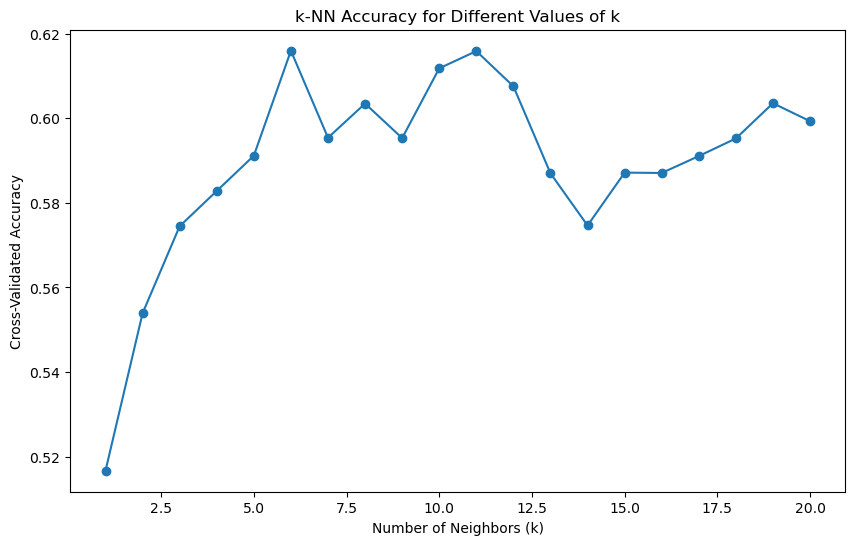

The optimal number of neighbors is k=6


In [31]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_values = range(1, 21) 
cv_scores = [] 

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Accuracy for Different Values of k')
plt.show()

optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is k={optimal_k}")


## 4. Evaluation

Optimized k-NN Model Accuracy with k=6: 0.5574


<Figure size 800x600 with 0 Axes>

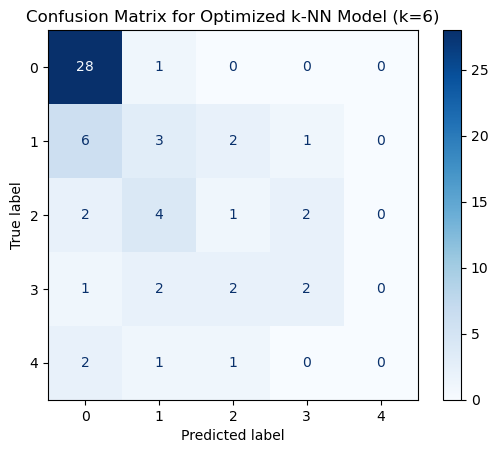

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Train
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized k-NN Model Accuracy with k={optimal_k}: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm).plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix for Optimized k-NN Model (k={optimal_k})")
plt.show()


## 6. ROC curve

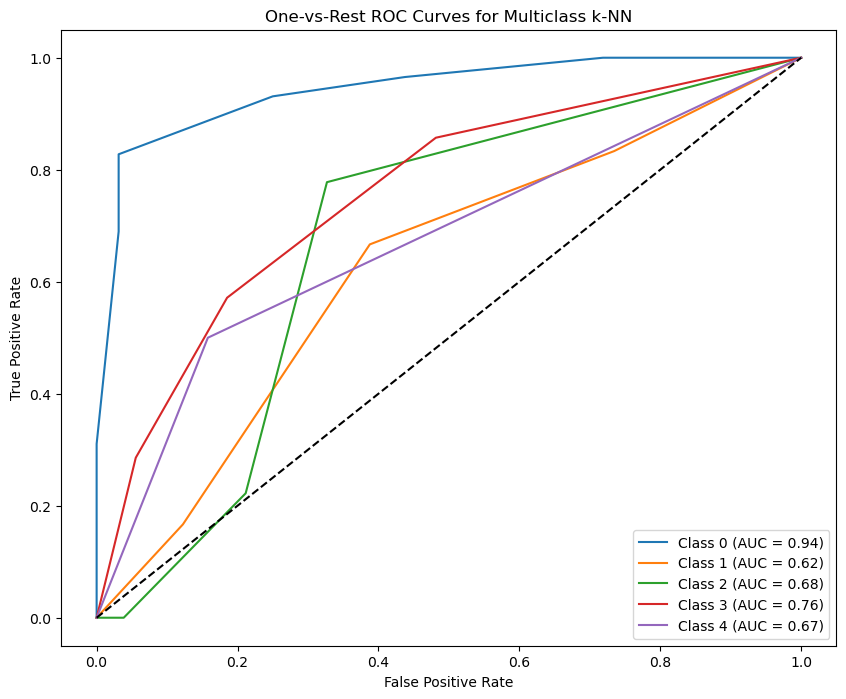

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_prob = knn_model.predict_proba(X_test)  

plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves for Multiclass k-NN")
plt.legend(loc="best")
plt.show()
